<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Horror_Analysis_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df= pd.read_csv('Horror Movies IMDb.csv')

In [8]:
df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    object 
 7   Gross        637 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.4+ KB


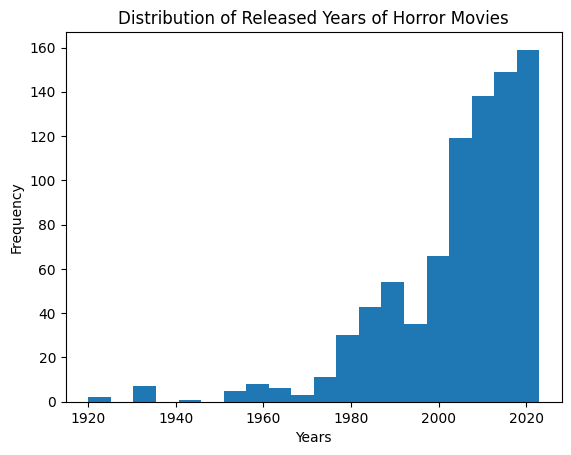

In [10]:
plt.hist(df['Movie Year'],bins=20)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Distribution of Released Years of Horror Movies')
plt.show()


In [13]:
import plotly.graph_objects as go
import plotly.subplots as sp
oldest_movies=df.nsmallest(5,'Movie Year')
newest_movies=df.nlargest(5,'Movie Year')

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ("Oldest Horror Movies", "Newest Horror Movies"))
fig.add_trace(go.Scatter(x=oldest_movies['Movie Title'],y=oldest_movies['Movie Year'],
                        mode='markers',
                         marker=dict(size=10),
                         name='Oldest Horror Movies'),row=1,col=1)
fig.add_trace(go.Scatter(x=newest_movies['Movie Title'],y=newest_movies['Movie Year'],
                         mode='markers',
                         marker=dict(size=10),
                         name='Newest Horror Movies'),row=1,col=2)
fig.update_layout(title='Oldest & Newest Horror Movies',xaxis_title='Movie Name',yaxis_title='Year')
fig.show()

In [14]:
longest_movies=df.nlargest(5,'Runtime')
shortest_movies=df.nsmallest(5,'Runtime')
import plotly.express as px
fig1=px.scatter(longest_movies,x='Movie Title',y='Runtime',
                title='Longest Movies')
fig1.show()


In [15]:
fig2=px.scatter(shortest_movies,x='Movie Title',y='Runtime',title='shortest Movies')
fig2.show()

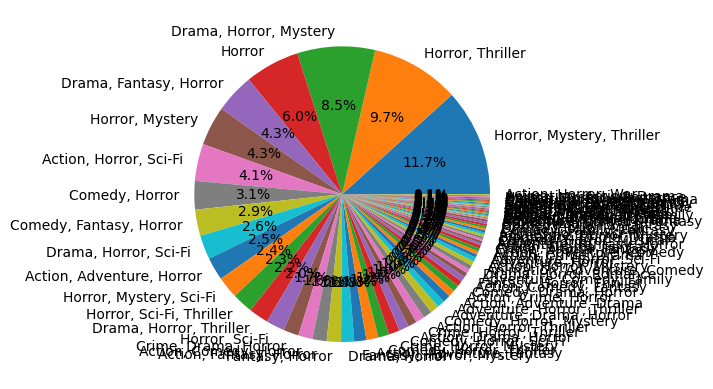

In [16]:
plt.pie(x=df['Genre'].value_counts().values,labels=df['Genre'].value_counts().index,autopct='%1.1f%%')
plt.show()

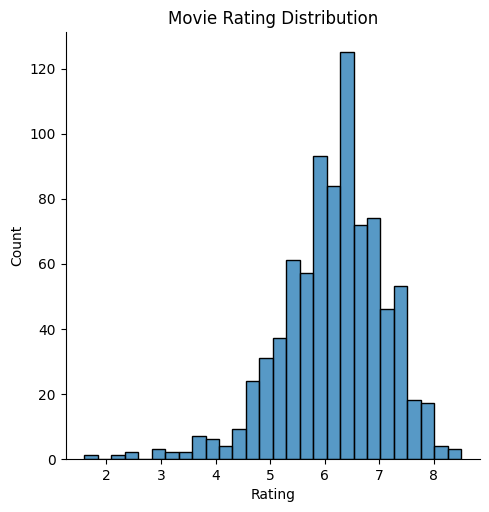

In [18]:
sns.displot(data=df,x='Rating')
plt.title('Movie Rating Distribution')
plt.show()

In [21]:
highest_rating_movies = df.nlargest(5, 'Rating')
lowest_rating_movies = df.nsmallest(5, 'Rating')

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ("High Rating Movies", "Low Rating Movies"))

fig.add_trace(go.Scatter(x = highest_rating_movies['Movie Title'], y = highest_rating_movies['Rating'],
                         mode = 'markers',
                         marker = dict(size = 10),
                         name = 'High Rating Movies'), row = 1, col = 1)

fig.add_trace(go.Scatter(x = lowest_rating_movies['Movie Title'], y = lowest_rating_movies['Rating'],
                         mode = 'markers',
                         marker = dict(size = 10),
                         name = 'Low Rating Movies'), row = 1, col = 2)

fig.update_layout(title = 'Movies with Highest & Lowest Ratings', xaxis_title = 'Movie Name', yaxis_title = 'Rating')

fig.show()

In [22]:
import plotly.graph_objects as go
director_counts=df['Director'].value_counts().head(10)
fig=go.Figure(data=go.Bar(x=director_counts.index,y=director_counts.values))
fig.update_layout(
    title='TOP 10 Directors by Movies Count',
    xaxis_title='Director',
    yaxis_title='Horror Movie Count'
)

fig.show()

In [23]:
df['Votes']=df['Votes'].str.replace(',','').astype(int)
df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,905275,$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,689068,$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,1051582,$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,439793,$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,53297,NaN


In [24]:
most_voted_movies = df.nlargest(5, 'Votes')
least_voted_movies = df.nsmallest(5, 'Votes')

fig = go.Figure()

fig.add_trace(go.Bar(x = most_voted_movies['Movie Title'],
                     y = most_voted_movies['Votes'],
                     name = 'Most Voted Movies'))
fig.add_trace(go.Bar(x = least_voted_movies['Movie Title'],
                    y = least_voted_movies['Votes'],
                    name = 'Least Voted Movies'))
fig.update_layout(barmode = 'group', title = 'Most & Least Voted Movies', xaxis_title = 'Movie Title', yaxis_title = 'Votes')

fig.show()

In [25]:
# Edit Gross Column
df['Gross'] = df['Gross'].str.replace('$', '')  # Remove $ sign
df['Gross'] = df['Gross'].str.replace('M', 'e6').str.replace('B', 'e9')  # Edit M units
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')  # Convert to int form
mean_gross = df['Gross'].mean()  # Mean of the Gross column
df['Gross'] = df['Gross'].fillna(mean_gross)  # Fill NaN values with mean value
df.head()

<ipython-input-25-07f6359098e7>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,905275,7.890000e+07
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,689068,3.200000e+07
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,1051582,4.402000e+07
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,439793,1.378000e+07
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,53297,3.435234e+07


In [26]:
highest_grossing_movies = df.nlargest(5, 'Gross')
lowest_grossing_movies = df.nsmallest(5, 'Gross')

fig = go.Figure()

fig.add_trace(go.Bar(x = highest_grossing_movies['Movie Title'],
                     y = highest_grossing_movies['Gross'],
                     name = 'Highest Grossing Movies'))

fig.add_trace(go.Bar(x = lowest_grossing_movies['Movie Title'],
                    y = lowest_grossing_movies['Gross'],
                    name = 'Lowest Grossing Movies'))

fig.update_layout(barmode = 'group', title = 'Highest & Lowest Grossing Movies', xaxis_title = 'Movie Title', yaxis_title = 'Gross')

fig.show()